# 📈 Análise Exploratória (EDA)
## 🔄 Ajuste do Diretório de Trabalho

Antes de carregar ou manipular arquivos, é importante garantir que estamos no diretório correto do projeto.  
O código abaixo verifica se o notebook está sendo executado a partir da pasta `notebooks`. Se for o caso, ele sobe um nível na hierarquia de diretórios para garantir que o diretório de trabalho seja a raiz do projeto.

Isso é útil para manter caminhos relativos consistentes ao acessar dados, scripts ou outros recursos do projeto.

📌 **Resumo do que o código faz:**
- Verifica se o diretório atual termina com `notebooks`.
- Se sim, volta uma pasta (para a raiz do projeto).
- Exibe o novo diretório de trabalho.


In [42]:
import os

# Verifica se o diretório de trabalho atual termina com 'notebooks'
if os.path.basename(os.getcwd()) == 'notebooks':
    # Se sim, sobe um nível de diretório para a pasta raiz do projeto
    os.chdir('..')

# Imprime o diretório de trabalho para confirmar que a mudança foi feita
print(f"Diretório de Trabalho Atual: {os.getcwd()}")

Diretório de Trabalho Atual: c:\Users\Carlo\Desktop\Portfolio\postech-challenge-ibov


## ⚙️ Carregamento de Bibliotecas e Configurações do Projeto

Nesta etapa, realizamos a importação das principais bibliotecas que serão utilizadas ao longo do projeto, organizadas por finalidade:

- 📁 **Configurações do Projeto**:  
  Importamos o módulo `src.config`, que armazena configurações como caminhos de arquivos, variáveis globais e parâmetros fixos.

- 📊 **Manipulação de Dados**:  
  - `pandas` e `numpy` para operações de estruturação e análise de dados.  
  - `duckdb` para consultas SQL diretamente em DataFrames.

- ⚙️ **Engenharia de Atributos**:  
  - `pandas_ta` é uma biblioteca especializada para análise técnica, útil para projetos com dados temporais (ex: séries financeiras).

- 📈 **Visualização de Dados**:  
  - `matplotlib.pyplot` e `seaborn` para construção de gráficos interativos e estilizados.

- 🧰 **Helpers do Notebook**:  
  - `display` do `IPython` facilita a visualização de objetos em células do notebook.

Além disso, aplicamos configurações visuais para padronizar os gráficos:
- Tema `whitegrid` do Seaborn.
- Estilo `fivethirtyeight` do Matplotlib.
- Habilitação do modo inline para que os gráficos sejam renderizados dentro do notebook.

```python
print("✅ Bibliotecas carregadas com sucesso!")


In [43]:
# --- Configurações do Projeto ---
import src.config as config  # Configurações do projeto (ex: caminho do DB)

# --- Manipulação de Dados ---
import duckdb
import numpy as np
import pandas as pd

# --- Engenharia de Atributos ---
import pandas_ta as ta

# --- Estatística e Modelagem ---
import statsmodels.api as sm
from scipy.stats import norm

# --- Visualização ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helpers do Notebook ---
from IPython.display import display
import warnings

# Apenas para notebooks (não funciona em scripts .py):
# %matplotlib inline

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


## 🧰 Configuração de Estilo e Exibição de Dados

Antes de iniciar a análise, definimos algumas configurações visuais e de exibição para melhorar a legibilidade dos outputs e a consistência gráfica.

### 📊 Configurações do `pandas`
- `max_columns = 100`: Permite visualizar até 100 colunas sem truncamento.
- `max_rows = 100`: Permite visualizar até 100 linhas diretamente no output.
- `float_format = '{:.2f}'`: Formata números decimais com 2 casas, facilitando a leitura.

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
```

In [44]:
# Pandas display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Estilo visual com Seaborn (engloba Matplotlib)
sns.set_theme(
    context='notebook',
    style='whitegrid',
    palette='viridis',
    font='sans-serif',
    font_scale=1.1,
    rc={
        'figure.figsize': (12, 6),
        'font.size': 12,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'lines.linewidth': 2,
        'grid.alpha': 0.3
    }
)

## 🗃️ Carregamento dos Dados

Nesta etapa, conectamos ao banco de dados local gerado nas fases anteriores.

Utilizamos o **DuckDB**, um banco de dados analítico embutido, eficiente para análise local de dados com sintaxe SQL.

📌 **Etapas realizadas:**
1. O caminho do banco de dados (`DB_PATH`) é recuperado do módulo de configurações `config`.
2. Estabelecemos uma conexão com o DuckDB em modo **somente leitura** (`read_only=True`), garantindo integridade.
3. Executamos uma query SQL para obter todos os registros da tabela `precos_diarios`.
4. A conexão é encerrada após a leitura.
5. O dataframe resultante é exibido com:
   - `df.info()` para verificar a estrutura.
   - `df.head()` para visualizar as primeiras linhas.

Em caso de falha, uma mensagem de erro orienta o usuário a verificar se o pipeline da Fase 1 foi executado corretamente e se o arquivo do banco existe no local esperado.


In [45]:
# --- Carregando os dados da Fase 1 ---

# O caminho para o banco de dados já está no nosso módulo 'config'
db_path = str(config.DB_PATH)

print(f"Carregando dados de: {db_path}")

try:
    # Conecta ao banco de dados DuckDB em modo de apenas leitura
    con = duckdb.connect(database=db_path, read_only=True)

    # Executa uma query SQL para selecionar todos os dados da nossa tabela
    df = con.execute("SELECT * FROM features_baseline").fetchdf()

    # Fecha a conexão com o banco de dados
    con.close()
    
    # --- Verificação ---
    print("\n✅ Dados carregados com sucesso! Verificando a estrutura:")
    df.info()

    print("\nExibindo as 5 primeiras linhas:")
    display(df.head())

except Exception as e:
    print(f"❌ Ocorreu um erro ao carregar os dados: {e}")
    print("Verifique se o pipeline da Fase 1 foi executado com sucesso e se o arquivo do banco de dados existe no local correto.")

Carregando dados de: C:\Users\Carlo\Desktop\Portfolio\postech-challenge-ibov\data\mercados.duckdb

✅ Dados carregados com sucesso! Verificando a estrutura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 89 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   data                             5334 non-null   datetime64[ns]
 1   close_petroleo_brent             5334 non-null   float64       
 2   close_petrobras                  5334 non-null   float64       
 3   close_dolar                      5334 non-null   float64       
 4   close_ibovespa                   5334 non-null   float64       
 5   close_sp500                      5334 non-null   float64       
 6   high_petroleo_brent              5334 non-null   float64       
 7   high_petrobras                   5334 non-null   float64       
 8   high_dolar                       5334 non-

,data,close_petroleo_brent,close_petrobras,close_dolar,close_ibovespa,close_sp500,high_petroleo_brent,high_petrobras,high_dolar,high_ibovespa,high_sp500,low_petroleo_brent,low_petrobras,low_dolar,low_ibovespa,low_sp500,open_petroleo_brent,open_petrobras,open_dolar,open_ibovespa,open_sp500,volume_petroleo_brent,volume_petrobras,volume_dolar,volume_ibovespa,volume_sp500,semana_do_mes,target,petroleo_brent_ret_acum_2d,petroleo_brent_ret_acum_5d,petroleo_brent_ret_acum_10d,petroleo_brent_ret_acum_21d,petrobras_ret_acum_2d,petrobras_ret_acum_5d,petrobras_ret_acum_10d,petrobras_ret_acum_21d,dolar_ret_acum_2d,dolar_ret_acum_5d,dolar_ret_acum_10d,dolar_ret_acum_21d,ibovespa_ret_acum_2d,ibovespa_ret_acum_5d,ibovespa_ret_acum_10d,ibovespa_ret_acum_21d,sp500_ret_acum_2d,sp500_ret_acum_5d,sp500_ret_acum_10d,sp500_ret_acum_21d,petroleo_brent_ret_diario,petrobras_ret_diario,dolar_ret_diario,ibovespa_ret_diario,sp500_ret_diario,petroleo_brent_ret_diario_lag_1,petrobras_ret_diario_lag_1,dolar_ret_diario_lag_1,ibovespa_ret_diario_lag_1,sp500_ret_diario_lag_1,petroleo_brent_ret_diario_lag_2,petrobras_ret_diario_lag_2,dolar_ret_diario_lag_2,ibovespa_ret_diario_lag_2,sp500_ret_diario_lag_2,petroleo_brent_ret_diario_lag_3,petrobras_ret_diario_lag_3,dolar_ret_diario_lag_3,ibovespa_ret_diario_lag_3,sp500_ret_diario_lag_3,petroleo_brent_ret_diario_lag_5,petrobras_ret_diario_lag_5,dolar_ret_diario_lag_5,ibovespa_ret_diario_lag_5,sp500_ret_diario_lag_5,gap_open_close_ibov,candle_body_ibov,candle_range_ibov,ret_sp500_ontem,ret_dolar_ontem,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,spread_petro_ibov,ret_dolar_1d,ret_ibov_1d,ret_diff_dolar_ibov,dia_da_semana,mes
0,2005-02-07,45.28,2.83,2.15,25732.00,1201.72,46.47,2.84,2.17,25736.00,1204.15,45.10,2.68,2.15,24818.00,1199.27,46.32,2.70,2.17,24874.00,1203.03,103691.00,87180800.00,0.00,0.00,1347270000.00,1,0,-0.03,-0.06,-0.07,-0.00,0.01,0.04,0.05,0.04,0.00,0.00,0.00,0.00,0.03,0.06,0.06,0.04,0.01,0.02,0.03,0.01,-0.03,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.03,0.01,-0.01,0.01,0.00,0.01,-0.00,-0.01,0.01,0.00,0.02,0.00,0.02,0.01,0.00,0.02,0.01,-858.00,858.00,918.00,0.01,0.00,23764.27,25018.40,26272.53,10.03,0.78,0.00,0.00,0.00,0.00,0,2
1,2005-02-08,45.40,2.83,2.15,25732.00,1202.30,46.05,2.84,2.17,25736.00,1205.11,44.78,2.68,2.15,24818.00,1200.16,45.40,2.70,2.17,24874.00,1201.72,99803.00,87180800.00,0.00,0.00,1416170000.00,2,1,-0.02,-0.04,-0.09,0.00,0.00,0.04,0.05,0.06,0.00,0.00,0.00,0.00,0.00,0.07,0.06,0.06,-0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,-0.03,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.03,0.01,-0.01,0.01,0.00,0.01,-0.00,-0.02,0.01,0.00,-0.01,0.01,-858.00,858.00,918.00,-0.00,0.00,24347.78,25335.00,26322.22,7.79,0.70,0.00,0.00,0.00,0.00,1,2
2,2005-02-09,45.46,2.95,2.15,26314.00,1191.99,46.40,3.01,2.17,26314.00,1203.83,44.60,2.90,2.15,25733.00,1191.54,45.45,2.97,2.17,25733.00,1202.30,139765.00,69043200.00,0.00,0.00,1511040000.00,2,0,0.00,-0.03,-0.07,-0.00,0.04,0.07,0.08,0.09,0.00,0.00,0.00,0.00,0.02,0.07,0.07,0.08,-0.01,-0.00,0.02,0.01,0.00,0.04,0.00,0.02,-0.01,0.00,0.00,0.00,0.00,0.00,-0.03,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.03,0.01,-0.01,0.01,0.00,0.02,0.00,1.00,581.00,581.00,0.00,0.00,24756.08,25676.80,26597.52,7.17,0.85,0.00,0.00,0.02,-0.02,2,2
3,2005-02-10,47.10,2.94,2.15,26416.00,1197.01,47.30,2.94,2.17,26456.00,1198.75,45.42,2.89,2.15,25882.00,1191.54,45.54,2.91,2.17,26314.00,1191.99,107519.00,31232000.00,0.00,0.00,1491670000.00,2,1,0.04,0.01,-0.04,0.02,0.04,0.05,0.08,0.09,0.00,0.00,0.00,0.00,0.03,0.06,0.10,0.08,-0.00,0.01,0.02,0.01,0.04,-0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.02,-0.01,0.00,0.00,0.00,0.00,0.00,-0.03,0.00,0.00,0.00,-0.00,-0.01,0.01,0.00,0.01,-0.00,0.00,102.00,574.00,-0.01,0.00,25361.64,25985.20,26608.76,4.80,0.85,0.00,0.00,0.00,-0.00,3,2
4,2005-02-11,47.16,2.99,2.15,26671.00,1205.30,47.48,3.02,2.17,26786.00,1208.38,46.75,2.93,2.15,26132.00,1193.28,46.97,2.93,2.17,26414.00,1197.01,83654.00,50934400.00,0.00,0.00,1562300000.00,2,0,0.04,0.01,-0.00,-0.02,0.01,0.06,0.11,0.10,0.00,0.00

## 🗓️ Ajuste do Índice Temporal

Para garantir uma manipulação adequada de séries temporais, realizamos o ajuste da coluna `data`, transformando-a no índice principal do DataFrame.

📌 **Etapas executadas:**
1. Convertida a coluna `'data'` para o tipo `datetime` com `pd.to_datetime()` para garantir que operações temporais funcionem corretamente (ex: resampling, filtros por período).
2. Definida como **índice do DataFrame** com `df.set_index('data', inplace=True)`, substituindo o índice numérico padrão.
3. Exibimos as primeiras linhas para confirmar a alteração, verificando que `'data'` agora aparece como índice à esquerda do DataFrame.

Esse passo é essencial em análises temporais, especialmente para séries de preços, permitindo ordenação cronológica, reamostragem e outras operações baseadas em tempo.


In [46]:
# Garante que a coluna 'data' esteja no formato datetime, caso ainda não esteja
df['data'] = pd.to_datetime(df['data'])
# df = df.drop('Unnamed: 0', axis=1) 

# Define a coluna 'data' como o novo índice do DataFrame
# O inplace=True modifica o DataFrame diretamente
df.set_index('data', inplace=True)

# Exibe as primeiras linhas para confirmar a mudança. 
# Note que 'data' agora está no lugar do índice numérico.
print("✅ Coluna 'data' definida como índice. A estrutura agora é:")
display(df.head())

✅ Coluna 'data' definida como índice. A estrutura agora é:


,close_petroleo_brent,close_petrobras,close_dolar,close_ibovespa,close_sp500,high_petroleo_brent,high_petrobras,high_dolar,high_ibovespa,high_sp500,low_petroleo_brent,low_petrobras,low_dolar,low_ibovespa,low_sp500,open_petroleo_brent,open_petrobras,open_dolar,open_ibovespa,open_sp500,volume_petroleo_brent,volume_petrobras,volume_dolar,volume_ibovespa,volume_sp500,semana_do_mes,target,petroleo_brent_ret_acum_2d,petroleo_brent_ret_acum_5d,petroleo_brent_ret_acum_10d,petroleo_brent_ret_acum_21d,petrobras_ret_acum_2d,petrobras_ret_acum_5d,petrobras_ret_acum_10d,petrobras_ret_acum_21d,dolar_ret_acum_2d,dolar_ret_acum_5d,dolar_ret_acum_10d,dolar_ret_acum_21d,ibovespa_ret_acum_2d,ibovespa_ret_acum_5d,ibovespa_ret_acum_10d,ibovespa_ret_acum_21d,sp500_ret_acum_2d,sp500_ret_acum_5d,sp500_ret_acum_10d,sp500_ret_acum_21d,petroleo_brent_ret_diario,petrobras_ret_diario,dolar_ret_diario,ibovespa_ret_diario,sp500_ret_diario,petroleo_brent_ret_diario_lag_1,petrobras_ret_diario_lag_1,dolar_ret_diario_lag_1,ibovespa_ret_diario_lag_1,sp500_ret_diario_lag_1,petroleo_brent_ret_diario_lag_2,petrobras_ret_diario_lag_2,dolar_ret_diario_lag_2,ibovespa_ret_diario_lag_2,sp500_ret_diario_lag_2,petroleo_brent_ret_diario_lag_3,petrobras_ret_diario_lag_3,dolar_ret_diario_lag_3,ibovespa_ret_diario_lag_3,sp500_ret_diario_lag_3,petroleo_brent_ret_diario_lag_5,petrobras_ret_diario_lag_5,dolar_ret_diario_lag_5,ibovespa_ret_diario_lag_5,sp500_ret_diario_lag_5,gap_open_close_ibov,candle_body_ibov,candle_range_ibov,ret_sp500_ontem,ret_dolar_ontem,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,spread_petro_ibov,ret_dolar_1d,ret_ibov_1d,ret_diff_dolar_ibov,dia_da_semana,mes
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-02-07,45.28,2.83,2.15,25732.00,1201.72,46.47,2.84,2.17,25736.00,1204.15,45.10,2.68,2.15,24818.00,1199.27,46.32,2.70,2.17,24874.00,1203.03,103691.00,87180800.00,0.00,0.00,1347270000.00,1,0,-0.03,-0.06,-0.07,-0.00,0.01,0.04,0.05,0.04,0.00,0.00,0.00,0.00,0.03,0.06,0.06,0.04,0.01,0.02,0.03,0.01,-0.03,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.03,0.01,-0.01,0.01,0.00,0.01,-0.00,-0.01,0.01,0.00,0.02,0.00,0.02,0.01,0.00,0.02,0.01,-858.00,858.00,918.00,0.01,0.00,23764.27,25018.40,26272.53,10.03,0.78,0.00,0.00,0.00,0.00,0,2
2005-02-08,45.40,2.83,2.15,25732.00,1202.30,46.05,2.84,2.17,25736.00,1205.11,44.78,2.68,2.15,24818.00,1200.16,45.40,2.70,2.17,24874.00,1201.72,99803.00,87180800.00,0.00,0.00,1416170000.00,2,1,-0.02,-0.04,-0.09,0.00,0.00,0.04,0.05,0.06,0.00,0.00,0.00,0.00,0.00,0.07,0.06,0.06,-0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,-0.03,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.03,0.01,-0.01,0.01,0.00,0.01,-0.00,-0.02,0.01,0.00,-0.01,0.01,-858.00,858.00,918.00,-0.00,0.00,24347.78,25335.00,26322.22,7.79,0.70,0.00,0.00,0.00,0.00,1,2
2005-02-09,45.46,2.95,2.15,26314.00,1191.99,46.40,3.01,2.17,26314.00,1203.83,44.60,2.90,2.15,25733.00,1191.54,45.45,2.97,2.17,25733.00,1202.30,139765.00,69043200.00,0.00,0.00,1511040000.00,2,0,0.00,-0.03,-0.07,-0.00,0.04,0.07,0.08,0.09,0.00,0.00,0.00,0.00,0.02,0.07,0.07,0.08,-0.01,-0.00,0.02,0.01,0.00,0.04,0.00,0.02,-0.01,0.00,0.00,0.00,0.00,0.00,-0.03,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.03,0.01,-0.01,0.01,0.00,0.02,0.00,1.00,581.00,581.00,0.00,0.00,24756.08,25676.80,26597.52,7.17,0.85,0.00,0.00,0.02,-0.02,2,2
2005-02-10,47.10,2.94,2.15,26416.00,1197.01,47.30,2.94,2.17,26456.00,1198.75,45.42,2.89,2.15,25882.00,1191.54,45.54,2.91,2.17,26314.00,1191.99,107519.00,31232000.00,0.00,0.00,1491670000.00,2,1,0.04,0.01,-0.04,0.02,0.04,0.05,0.08,0.09,0.00,0.00,0.00,0.00,0.03,0.06,0.10,0.08,-0.00,0.01,0.02,0.01,0.04,-0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.02,-0.01,0.00,0.00,0.00,0.00,0.00,-0.03,0.00,0.00,0.00,-0.00,-0.01,0.01,0.00,0.01,-0.00,0.00,102.00,574.00,-0.01,0.00,25361.64,25985.20,26608.76,4.80,0.85,0.00,0.00,0.00,-0.00,3,2
2005-02-11,47.16,2.99,2.15,26671.00,1205.30,47.48,3.02,2.17,26786.00,1208.38,46.75,2.93,2.15,26132.00,1193.28,46.97,2.93,2.17,26414.00,1197.01,83654.00,50934400.00,0

## 📈 Visualização das Séries Temporais de Valor de Fechamento

Agora que o índice do DataFrame está configurado como uma série temporal (`data`), selecionamos apenas as colunas que representam Valor de fechamento (prefixo `close_`) para visualização.

📌 **Etapas realizadas:**
1. Utilizamos `df.filter(like='close')` para selecionar automaticamente todas as colunas com o prefixo `close_`, representando os preços de fechamento dos ativos.

2. Criamos múltiplos **subplots verticais**, um para cada ativo, com os seguintes parâmetros:
   - `nrows`: igual ao número de ativos.
   - `sharex=True`: todos os gráficos compartilham o mesmo eixo X (tempo), permitindo alinhamento temporal.

3. Cada subplot exibe a série temporal de um ativo individualmente:
   - O título de cada subplot é o nome da coluna (ativo).
   - O eixo Y representa o preço de fechamento.
   - A legenda é omitida (`legend=False`) para evitar poluição visual.

4. Um **título geral** é adicionado à figura, e o layout é ajustado com `tight_layout()` para evitar sobreposição de elementos.

Essa abordagem é útil para observar a evolução temporal individual dos ativos e comparar suas tendências visuais ao longo do tempo.


1. Médias móveis

In [47]:


# --- ETAPA 1: Definir as janelas de tempo que queremos analisar ---
janelas_ma = [2, 5, 7, 10, 14, 21]

# --- ETAPA 2: Criar as médias móveis e as features de relação em um único loop ---

for periodo in janelas_ma:
    # --- Para o IBOVESPA ---
    
    # Nome da coluna da média móvel (você já as tem, mas este código também as criaria)
    ma_ibov_col = f'ibov_ma{periodo}'
    # Nome da nova feature oscilador
    osc_ibov_col = f'ibov_vs_ma{periodo}'
    
    # Calcula a média móvel (caso ainda não exista)
    df[ma_ibov_col] = df['close_ibovespa'].rolling(window=periodo).mean()
    # Calcula a nova feature: log(preço / média móvel)
    df[osc_ibov_col] = np.log(df['close_ibovespa'] / df[ma_ibov_col])

    # --- Para o DÓLAR (aplicando a mesma lógica) ---
    
    # Nome da coluna da média móvel para o Dólar
    ma_dolar_col = f'dolar_ma{periodo}'
    # Nome da nova feature oscilador para o Dólar
    osc_dolar_col = f'dolar_vs_ma{periodo}'
    
    # Calcula a média móvel para o Dólar
    df[ma_dolar_col] = df['close_dolar'].rolling(window=periodo).mean()
    # Calcula a nova feature para o Dólar
    df[osc_dolar_col] = np.log(df['close_dolar'] / df[ma_dolar_col])

# --- ETAPA 3: Limpeza ---
# As operações de rolling e log/shift criam NaNs no início do DataFrame
df = df.dropna()


# Visualizando as novas colunas criadas
print("Novas colunas de osciladores criadas:")
print(df[[col for col in df.columns if 'vs_ma' in col]].head())

Novas colunas de osciladores criadas:
            ibov_vs_ma2  dolar_vs_ma2  ibov_vs_ma5  dolar_vs_ma5  ibov_vs_ma7  \
data                                                                            
2005-03-07         0.00          0.00         0.03          0.00         0.03   
2005-03-08        -0.01          0.00         0.00          0.00         0.01   
2005-03-09        -0.01          0.00        -0.02          0.00        -0.01   
2005-03-10         0.00          0.00        -0.01          0.00        -0.01   
2005-03-11        -0.01          0.00        -0.02          0.00        -0.02   

            dolar_vs_ma7  ibov_vs_ma10  dolar_vs_ma10  ibov_vs_ma14  \
data                                                                  
2005-03-07          0.00          0.04           0.00          0.06   
2005-03-08          0.00          0.02           0.00          0.04   
2005-03-09          0.00         -0.00           0.00          0.01   
2005-03-10          0.00         -0.00 

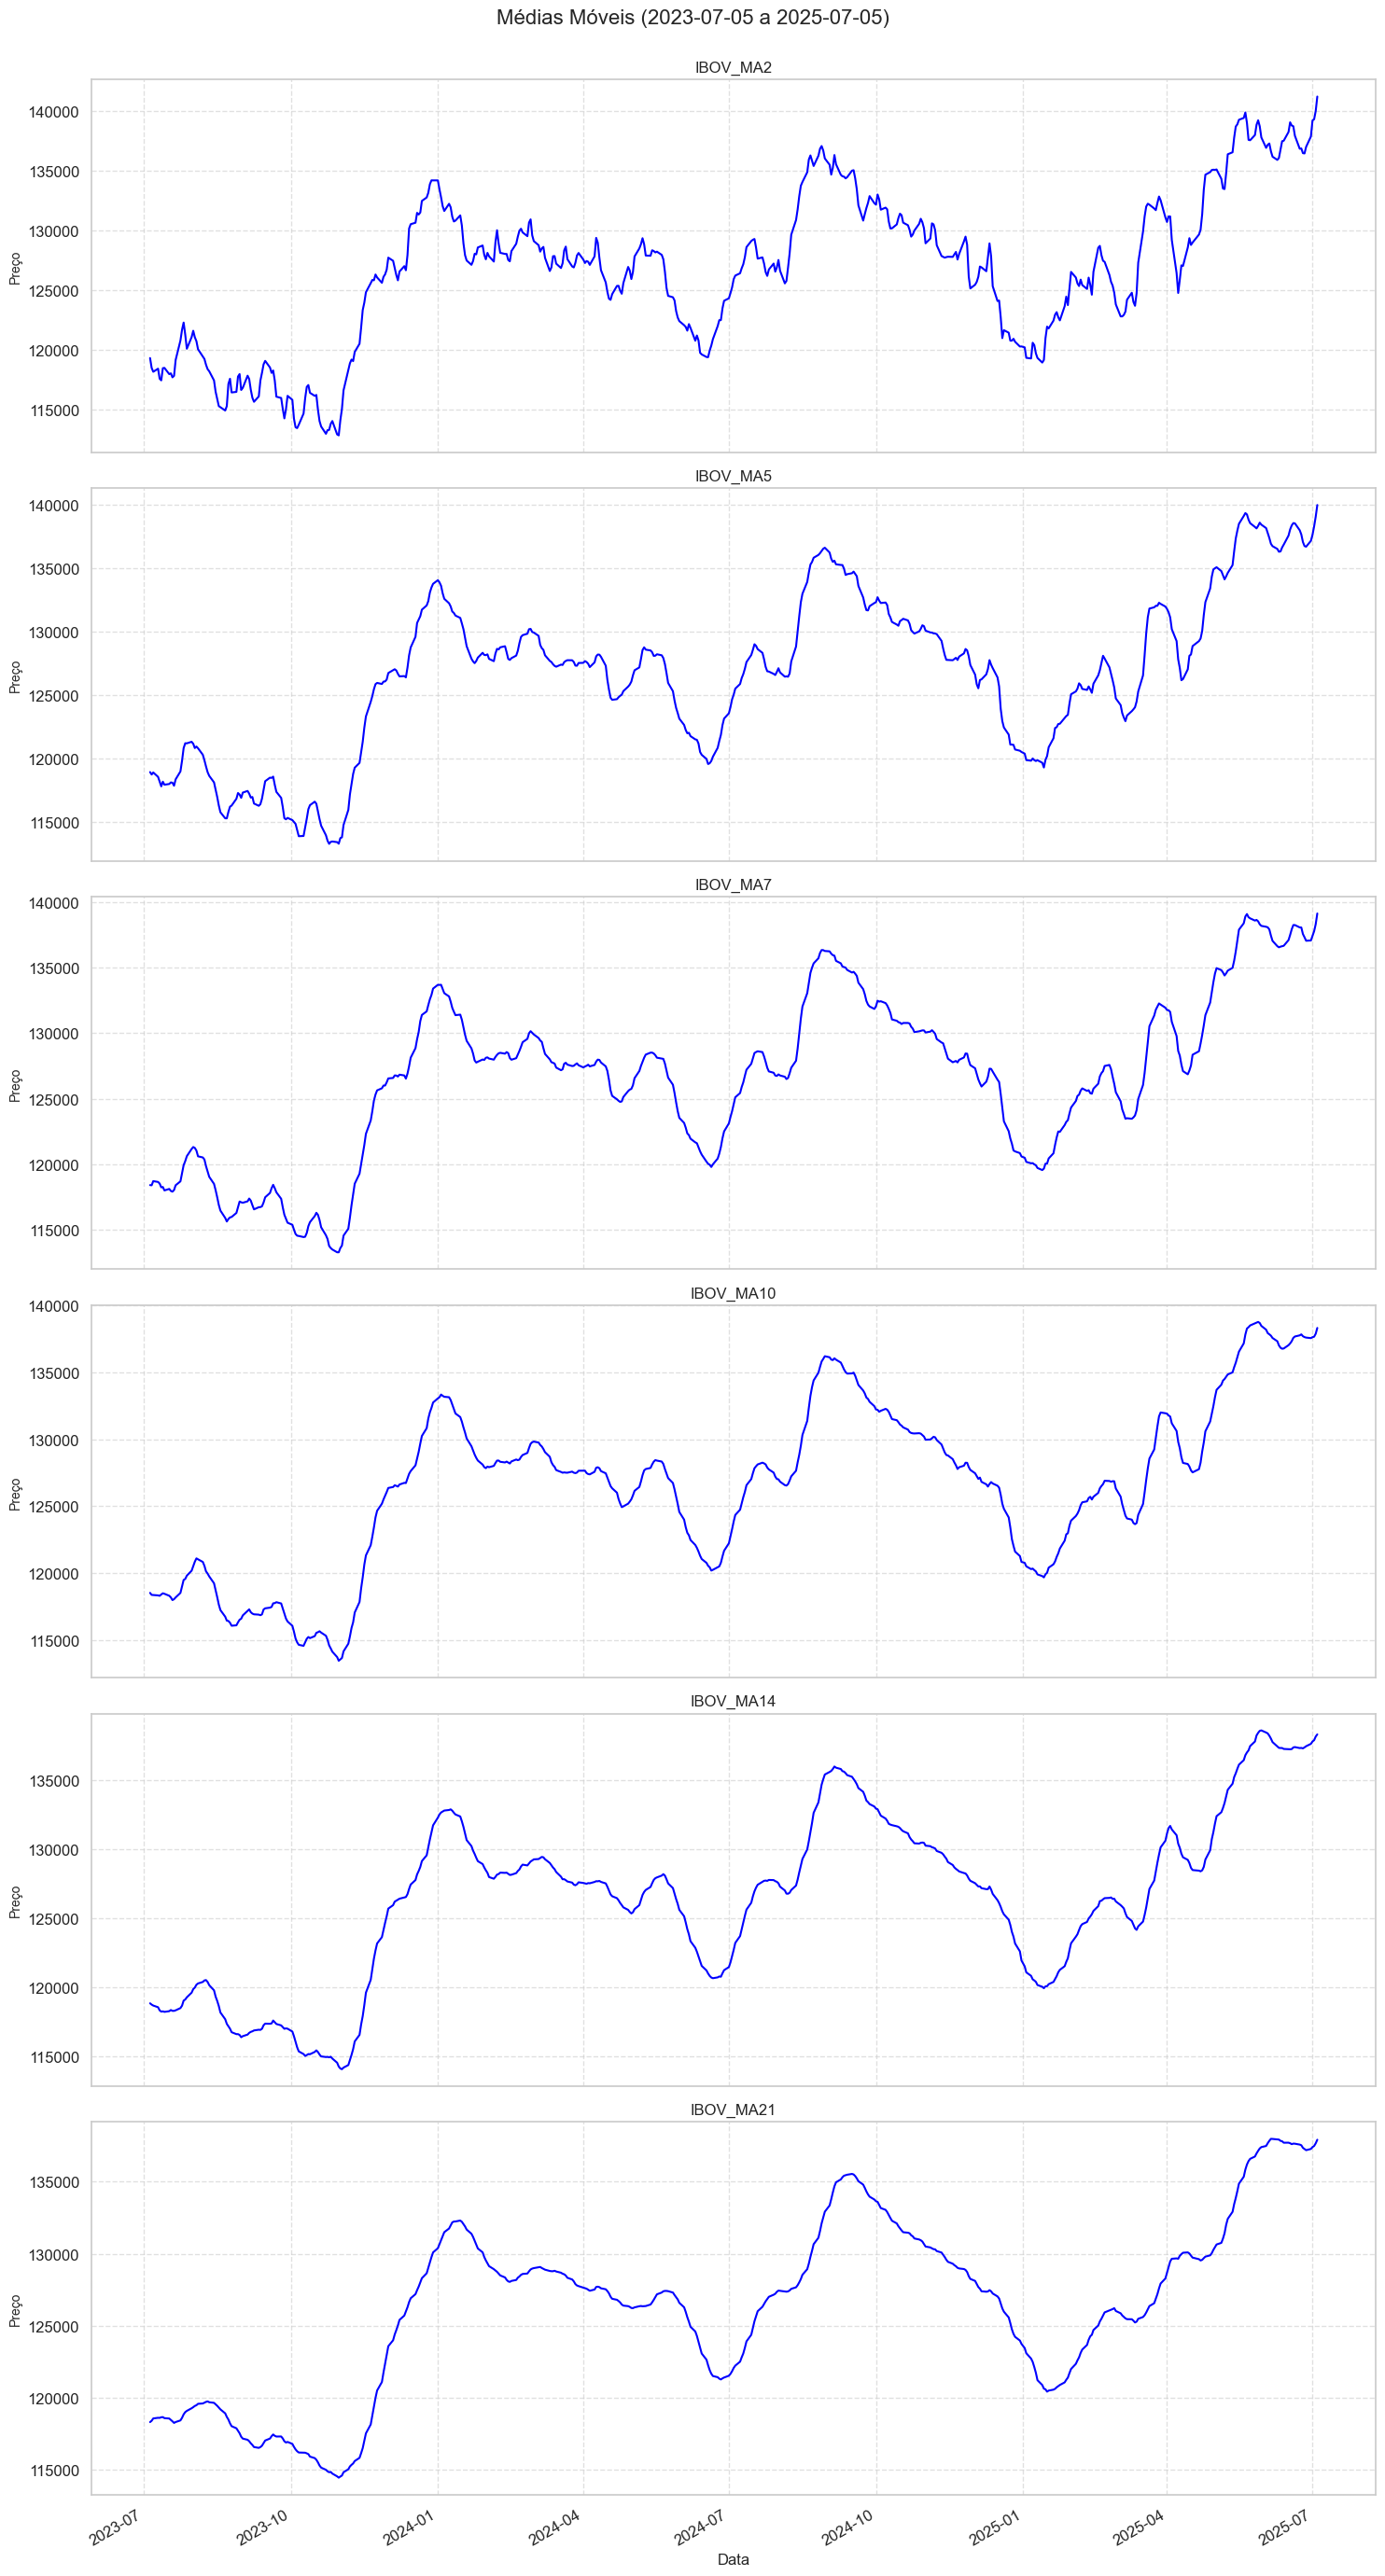

In [48]:

# --- FILTRAGEM DE DADOS PARA O PERÍODO DE 2 ANOS ---
start_date_2y = '2023-07-05'
end_date_2y = '2025-07-05'

# Filtra o DataFrame para o período de 2 anos
df_2y = df.loc[start_date_2y:end_date_2y]

# Seleciona apenas as colunas de médias móveis (exemplo: 'ibov_ma5', 'ibov_ma20', etc.)
df_ma = df_2y.filter(like='ibov_ma')  # ou df_2y.filter(regex='_ma[0-9]+')

# Verifica se existem colunas de médias móveis
if df_ma.empty:
    raise ValueError("Nenhuma coluna de média móvel encontrada. Verifique os nomes das colunas.")

# --- CRIAÇÃO DOS GRÁFICOS ---
num_plots = len(df_ma.columns)

# Configura a figura e os subplots
fig, axes = plt.subplots(
    nrows=num_plots,
    ncols=1,
    figsize=(15, 5 * num_plots),  # Ajusta a altura com base no número de gráficos
    sharex=True
)

# Se houver apenas um subplot, `axes` não será uma lista, então convertemos
if num_plots == 1:
    axes = [axes]

# Título geral
fig.suptitle(f'Médias Móveis ({start_date_2y} a {end_date_2y})', fontsize=16, y=0.95)

# Plota cada média móvel em um subplot separado
for i, column in enumerate(df_ma.columns):
    ax = axes[i]
    df_ma[column].plot(ax=ax, legend=False, color='blue', linewidth=1.5)
    ax.set_title(column.upper(), fontsize=12)
    ax.set_ylabel('Preço', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

# Ajusta o layout e rótulos
plt.xlabel('Data', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o espaço para o título
plt.show()

2. Suavização exponencial

In [49]:
df['ibov_ewm_5'] = df['close_ibovespa'].ewm(span=5, adjust=False).mean()
df['ibov_ewm_7'] = df['close_ibovespa'].ewm(span=7, adjust=False).mean()
df['ibov_ewm_9'] = df['close_ibovespa'].ewm(span=9, adjust=False).mean()
df['ibov_ewm_10'] = df['close_ibovespa'].ewm(span=10, adjust=False).mean()
df['ibov_ewm_12'] = df['close_ibovespa'].ewm(span=12, adjust=False).mean()
df['ibov_ewm_15'] = df['close_ibovespa'].ewm(span=15, adjust=False).mean()
df['ibov_ewm_20'] = df['close_ibovespa'].ewm(span=20, adjust=False).mean()


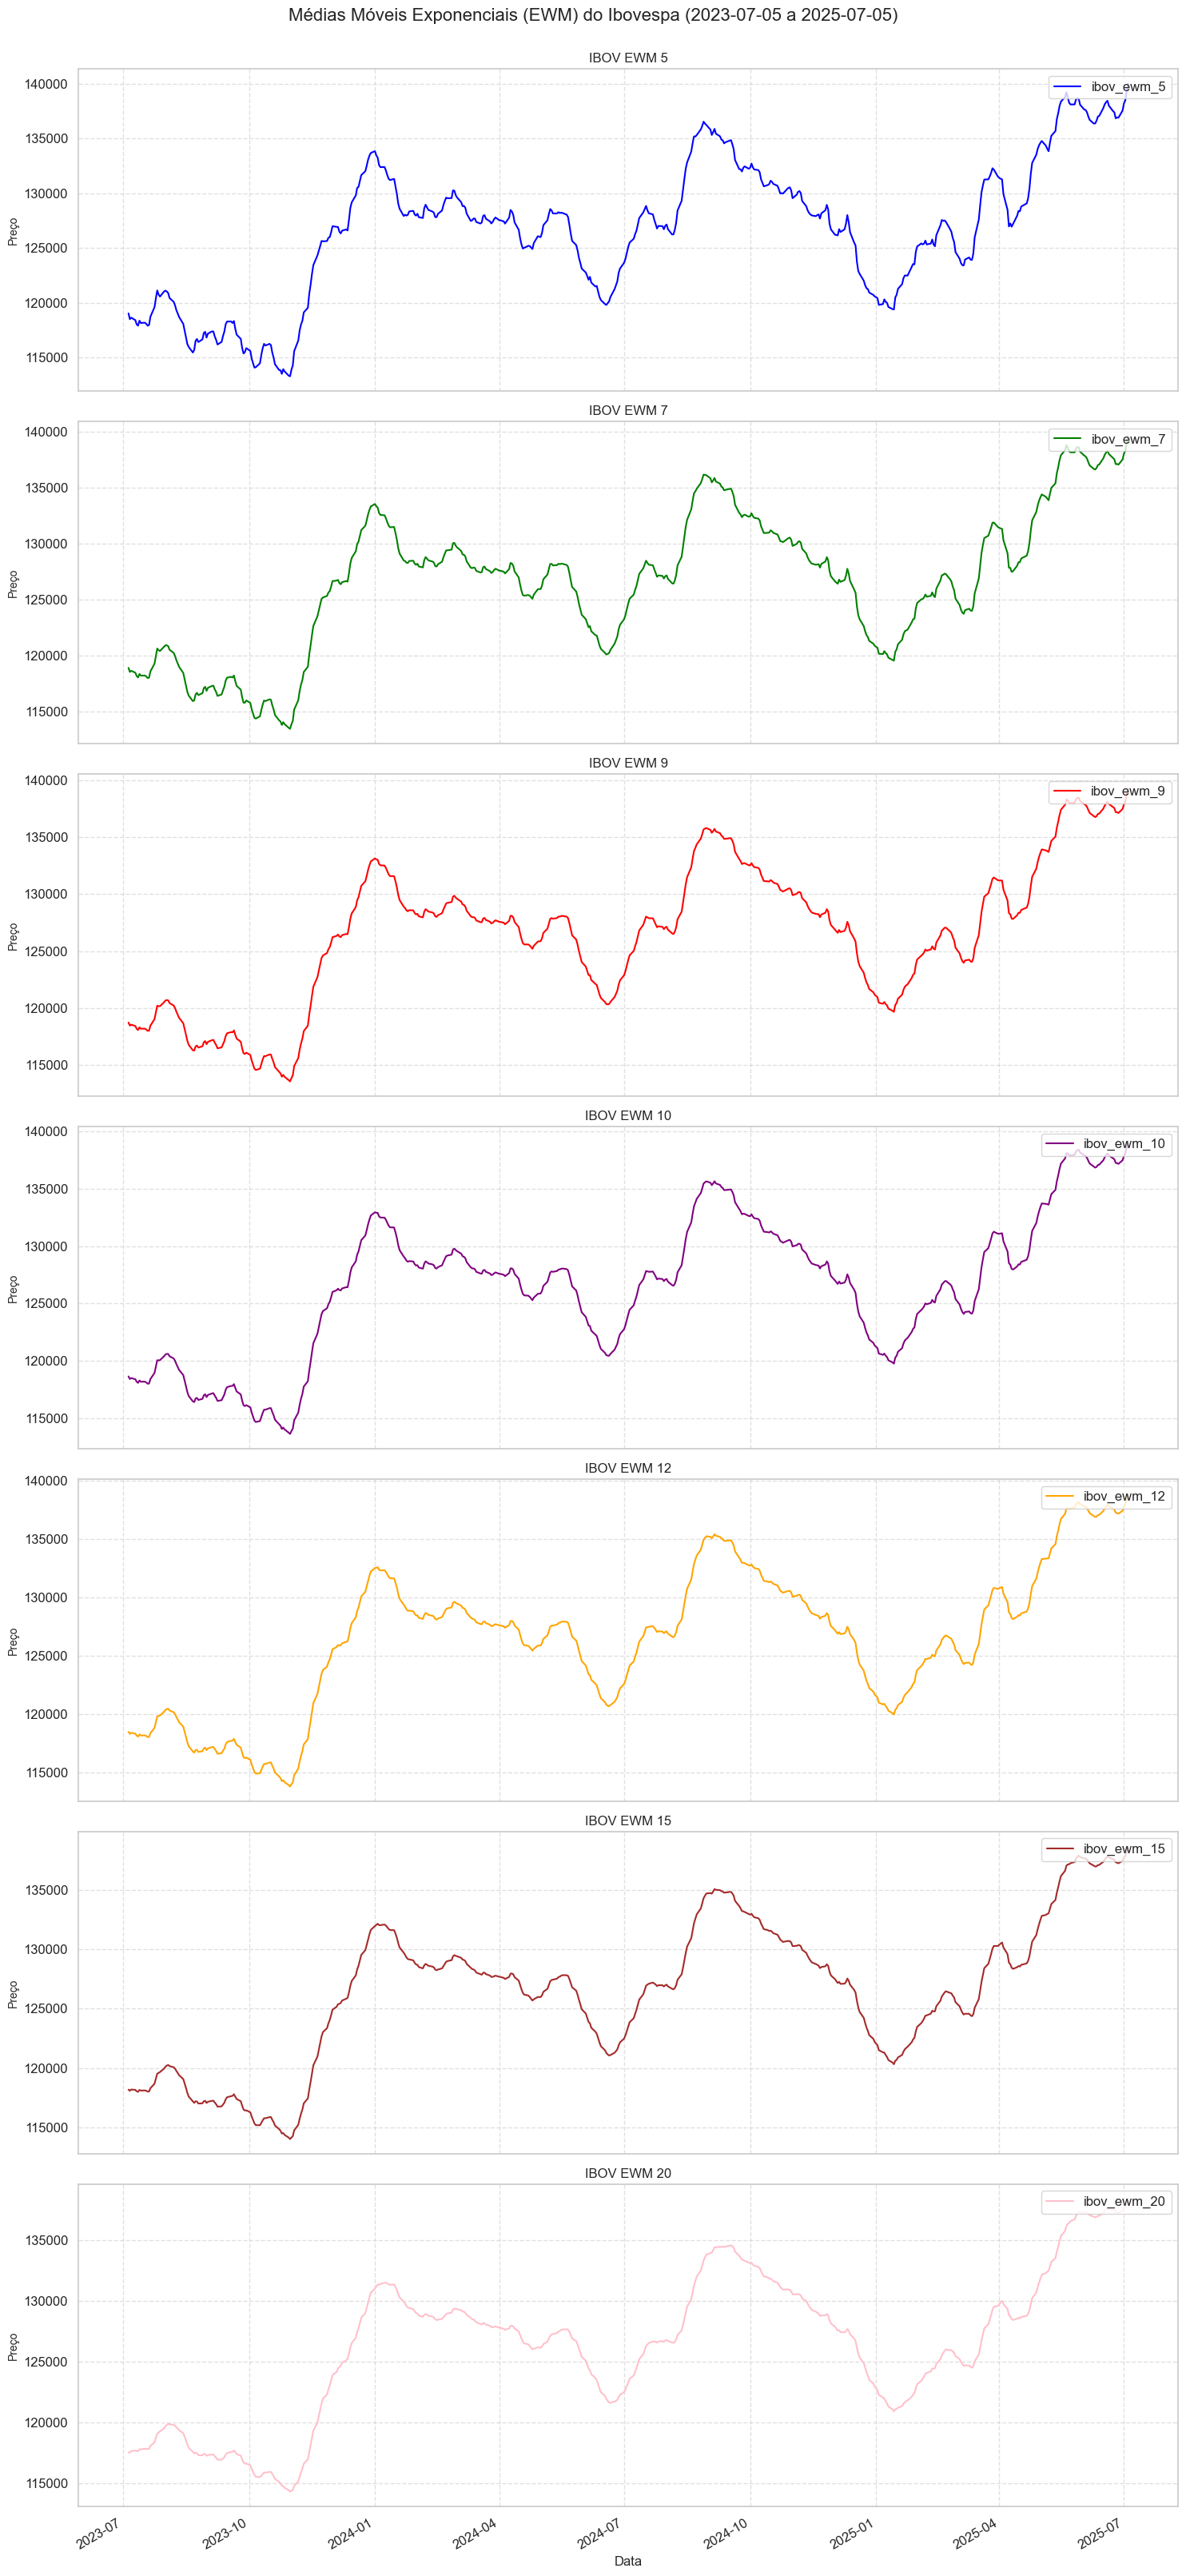

In [50]:

# --- FILTRAGEM DE DADOS PARA O PERÍODO DE 2 ANOS ---
start_date_2y = '2023-07-05'
end_date_2y = '2025-07-05'

# Filtra o DataFrame para o período de 2 anos
df_2y = df.loc[start_date_2y:end_date_2y]

# Seleciona apenas as colunas de médias móveis exponenciais (EWM)
df_ewm = df_2y.filter(like='ibov_ewm_')  # Filtra colunas como 'ibov_ewm_5', 'ibov_ewm_7', etc.

# Verifica se existem colunas EWM
if df_ewm.empty:
    raise ValueError("Nenhuma coluna de média móvel exponencial encontrada. Verifique os nomes das colunas.")

# --- CRIAÇÃO DOS GRÁFICOS ---
num_plots = len(df_ewm.columns)

# Configura a figura e os subplots
fig, axes = plt.subplots(
    nrows=num_plots,
    ncols=1,
    figsize=(15, 5 * num_plots),  # Ajusta a altura conforme o número de gráficos
    sharex=True
)

# Se houver apenas um subplot, converte axes em lista
if num_plots == 1:
    axes = [axes]

# Título geral
fig.suptitle(
    f'Médias Móveis Exponenciais (EWM) do Ibovespa ({start_date_2y} a {end_date_2y})',
    fontsize=16,
    y=0.95
)

# Paleta de cores para diferenciar as EWMs
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

# Plota cada EWM em um subplot separado
for i, column in enumerate(df_ewm.columns):
    ax = axes[i]
    df_ewm[column].plot(
        ax=ax,
        legend=False,
        color=colors[i % len(colors)],  # Cicla pelas cores
        linewidth=1.5,
        label=column
    )
    ax.set_title(column.replace('_', ' ').upper(), fontsize=12)
    ax.set_ylabel('Preço', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper right')  # Adiciona legenda com o nome da EWM

# Ajusta o layout e rótulos
plt.xlabel('Data', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta espaço para o título
plt.show()

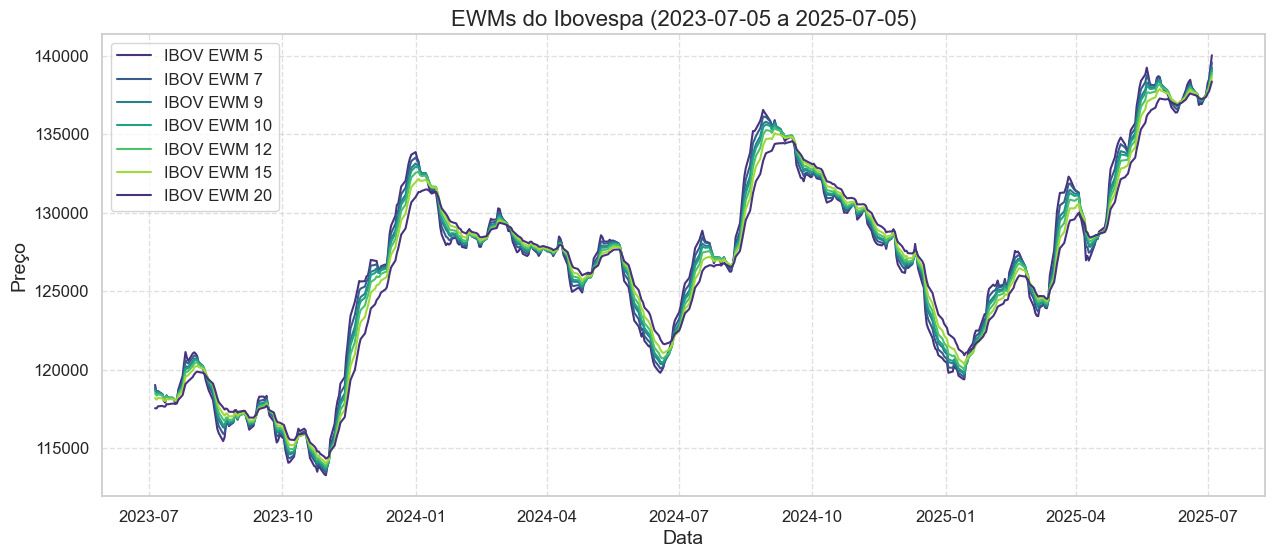

In [51]:
plt.figure(figsize=(15, 6))
for column in df_ewm.columns:
    plt.plot(df_ewm[column], label=column.replace('_', ' ').upper(), linewidth=1.5)
plt.title(f'EWMs do Ibovespa ({start_date_2y} a {end_date_2y})', fontsize=16)
plt.ylabel('Preço')
plt.xlabel('Data')
plt.grid(linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [52]:
# --- FILTRAGEM DE DADOS PARA O PERÍODO DE 4 ANOS (2021-2025) ---
start_date_ewm = '2023-07-05'
end_date_ewm = '2025-07-05'

# 1. Filtra o DataFrame para o período especificado
# Verifica primeiro se o índice é do tipo datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)  # Converte se não for datetime

df_ewm_s_e = df.loc[start_date_ewm:end_date_ewm].copy()  # Usar copy() para evitar SettingWithCopyWarning

# 2. Seleção das colunas de médias móveis exponenciais e close
# Correção: o operador pipe (|) no filter requer regex=True
df_ewm = df_ewm_s_e.filter(regex='ewm|close', axis=1)

# Alternativa mais explícita (recomendada):
# cols_to_keep = [col for col in df_ewm_s_e.columns if 'ewm' in col or 'close' in col]
# df_ewm = df_ewm_s_e[cols_to_keep]

# 3. Verificação do resultado
print(f"Período filtrado: {df_ewm.index.min()} a {df_ewm.index.max()}")
print(f"Colunas selecionadas: {list(df_ewm.columns)}")

Período filtrado: 2023-07-05 00:00:00 a 2025-07-04 00:00:00
Colunas selecionadas: ['close_petroleo_brent', 'close_petrobras', 'close_dolar', 'close_ibovespa', 'close_sp500', 'gap_open_close_ibov', 'ibov_ewm_5', 'ibov_ewm_7', 'ibov_ewm_9', 'ibov_ewm_10', 'ibov_ewm_12', 'ibov_ewm_15', 'ibov_ewm_20']


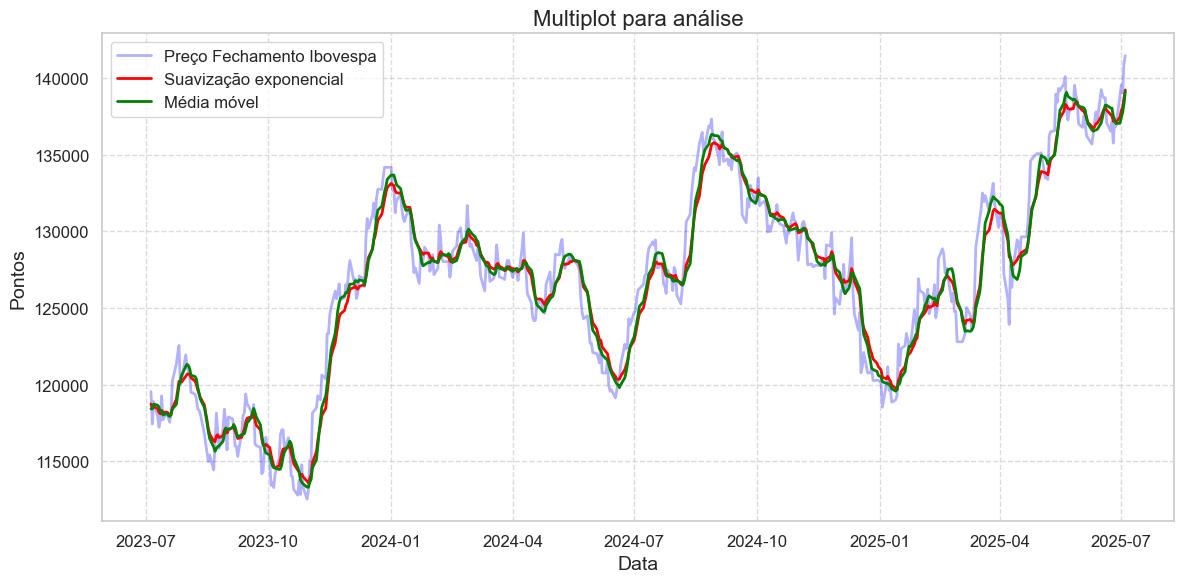

In [53]:

plt.figure(figsize=(12, 6))

# Plotando o preço original
plt.plot(df_ewm.index, df_ewm['close_ibovespa'], label='Preço Fechamento Ibovespa', color='blue', alpha=0.3)

# Plotando a suavização exponencial
plt.plot(df_ewm.index, df_ewm['ibov_ewm_9'], label='Suavização exponencial', color='red', linewidth=2)

plt.plot(df_ma.index, df_ma['ibov_ma7'], label='Média móvel', color='green', linewidth=2)

# Adicionando elementos importantes para análise
plt.title('Multiplot para análise')
plt.xlabel('Data')
plt.ylabel('Pontos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Explicação do Código: Cálculo de Retornos Diários do Ibovespa
O código df['ret_ibov'] = df['close_ibovespa'].pct_change() calcula os retornos percentuais diários do índice Ibovespa. Vamos decompor:

O que faz:
Calcula a variação percentual entre o preço de fechamento atual e o do dia anterior

Cria uma nova coluna chamada 'ret_ibov' no DataFrame com esses valores

Funcionamento detalhado:
df['close_ibovespa'] - Seleciona a coluna com os preços de fechamento do Ibovespa

.pct_change() - Método do pandas que calcula a variação percentual entre um valor e seu anterior

df['ret_ibov'] = - Atribui o resultado a uma nova coluna no DataFrame

In [54]:
df['ret_ibov_diario'] = df['close_ibovespa'].pct_change()
# Retorno acumulado em 5 dias (semanal)
df['ret_ibov_5d'] = df['close_ibovespa'].pct_change(5)

# Retorno acumulado em 21 dias (mensal)

df['ret_ibov_21d'] = df['close_ibovespa'].pct_change(21)



In [55]:


def criar_features_ibovespa(df):
    """
    Função completa para criação de features para análise do Ibovespa
    
    Parâmetros:
        df: DataFrame com colunas 'close_ibovespa' e 'close_dolar'
    
    Retorna:
        DataFrame com todas as features criadas
    """
    
    # --- ETAPA 1: Calcular os retornos diários (base para todas as features) ---
    df['log_ret_ibov_1d'] = np.log(df['close_ibovespa'] / df['close_ibovespa'].shift(1))
    df['log_ret_dolar_1d'] = np.log(df['close_dolar'] / df['close_dolar'].shift(1))
    
    # --- ETAPA 2: Features de Tendência (Retornos Acumulados) ---
    janelas_tendencia = {
        'curto_prazo': [3, 5],      # 3 e 5 dias úteis
        'medio_prazo': [10, 21],     # 2 semanas e 1 mês útil
        'longo_prazo': [42, 63, 126] # 2 meses, 3 meses e 6 meses úteis
    }
    
    for periodo, dias in janelas_tendencia.items():
        for dias in janelas_tendencia[periodo]:
            df[f'tendencia_ibov_{periodo}_{dias}d'] = np.log(df['close_ibovespa'] / df['close_ibovespa'].shift(dias))
            df[f'tendencia_dolar_{periodo}_{dias}d'] = np.log(df['close_dolar'] / df['close_dolar'].shift(dias))
    
    # --- ETAPA 3: Features de Momentum (Lags de Retornos) ---
    lags_momentum = {
        'ultimos_dias': [1, 2, 3],       # Dias imediatamente anteriores
        'semana_anterior': [5, 7],        # 1 semana útil e 1 semana calendário
        'mes_anterior': [15, 21]          # 3 semanas e 1 mês útil
    }
    
    for tipo, lags in lags_momentum.items():
        for lag in lags:
            df[f'momento_ibov_{tipo}_d-{lag}'] = df['log_ret_ibov_1d'].shift(lag)
            df[f'momento_dolar_{tipo}_d-{lag}'] = df['log_ret_dolar_1d'].shift(lag)
    
    # --- ETAPA 4: Features Relativas e Sintéticas ---
    # 1. Relação Ibovespa/Dólar
    df['ret_ibov_vs_dolar_1d'] = df['log_ret_ibov_1d'] - df['log_ret_dolar_1d']
    
    # 2. Spread entre tendências
    df['spread_ibov_dolar_21d'] = df['tendencia_ibov_medio_prazo_21d'] - df['tendencia_dolar_medio_prazo_21d']
    
    # 3. Volatilidade Relativa
    df['vol_relativa_5d'] = df['log_ret_ibov_1d'].rolling(5).std() / df['log_ret_dolar_1d'].rolling(5).std()
    
    # 4. Razão de Retornos (Ibovespa/Dólar)
    df['ratio_ret_ibov_dolar_1d'] = df['log_ret_ibov_1d'] / (df['log_ret_dolar_1d'] + 1e-10)  # Evitar divisão por zero
    
    # --- ETAPA 5: Features de Médias Móveis Relativas ---
    medias_moveis = {
        'curto_prazo': [5, 10],
        'medio_prazo': [20, 50],
        'longo_prazo': [100, 200]
    }
    
    for periodo, windows in medias_moveis.items():
        for window in windows:
            df[f'ibov_vs_ma{window}'] = df['close_ibovespa'] / df['close_ibovespa'].rolling(window).mean() - 1
            df[f'dolar_vs_ma{window}'] = df['close_dolar'] / df['close_dolar'].rolling(window).mean() - 1
    
    # --- ETAPA 6: Features de Eventos Extremos ---
    # 1. Dias com movimentos anormais (2 desvios padrão)
    df['abnormal_ibov_move'] = (df['log_ret_ibov_1d'].abs() > 2 * df['log_ret_ibov_1d'].rolling(21).std()).astype(int)
    
    # 2. Consecutive days with same direction
    df['ibov_direction'] = np.sign(df['log_ret_ibov_1d'])
    df['ibov_streak'] = df['ibov_direction'] * (df['ibov_direction'] == df['ibov_direction'].shift(1)).cumsum()
    
    # --- ETAPA 7: Limpeza Final ---
    # 1. Remoção de valores infinitos
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # 2. Preenchimento de NaN (método conservador)
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    
    # 3. Remoção de linhas com NaN residuais
    df = df.dropna()
    
    # 4. Remoção de colunas auxiliares
    df.drop(columns=['ibov_direction'], inplace=True)
    
    return df

# Exemplo de uso:
# df = criar_features_ibovespa(df)
# print(df.head())
# print(df.columns)

df = criar_features_ibovespa(df)
print(df.head())
print(df.columns)

            close_petroleo_brent  close_petrobras  close_dolar  \
data                                                             
2005-03-07                 53.89             3.36         2.15   
2005-03-08                 54.59             3.32         2.15   
2005-03-09                 54.77             3.26         2.15   
2005-03-10                 53.54             3.18         2.15   
2005-03-11                 54.43             3.13         2.15   

            close_ibovespa  close_sp500  high_petroleo_brent  high_petrobras  \
data                                                                           
2005-03-07        29455.00      1225.31                53.95            3.40   
2005-03-08        29021.00      1219.43                55.15            3.33   
2005-03-09        28514.00      1207.01                55.65            3.36   
2005-03-10        28567.00      1209.25                54.62            3.29   
2005-03-11        28075.00      1200.08                54

C:\Users\Carlo\AppData\Local\Temp\ipykernel_27912\2444789589.py:78: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Carlo\AppData\Local\Temp\ipykernel_27912\2444789589.py:79: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


<Figure size 1200x600 with 0 Axes>

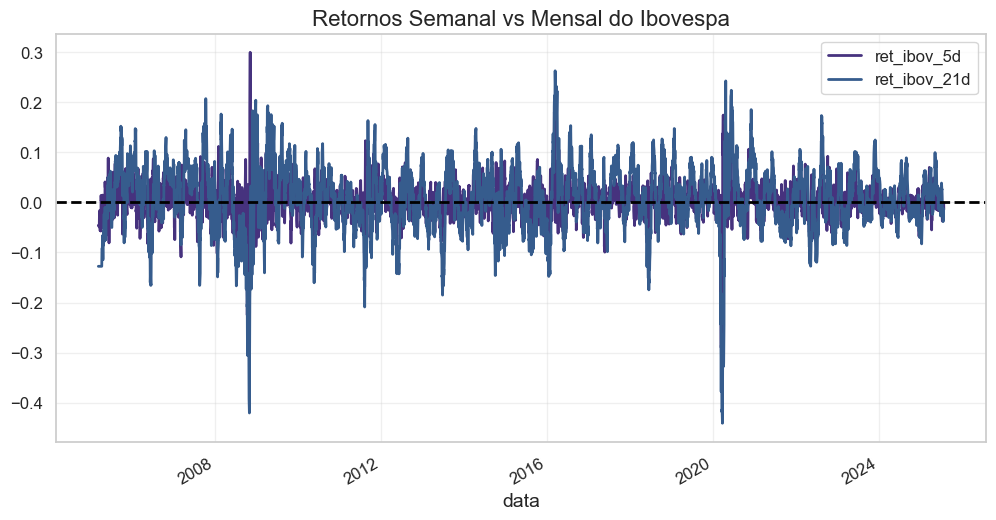

In [56]:
plt.figure(figsize=(12,6))
df[['ret_ibov_5d', 'ret_ibov_21d']].plot()
plt.title('Retornos Semanal vs Mensal do Ibovespa')
plt.axhline(0, color='black', linestyle='--')

O TRECHO ACIMA FOI FRUTO DE UMA IMPLEMENTAÇÃO PORCA E AINDA ESTÁ SUJEITO A ANÁLISE

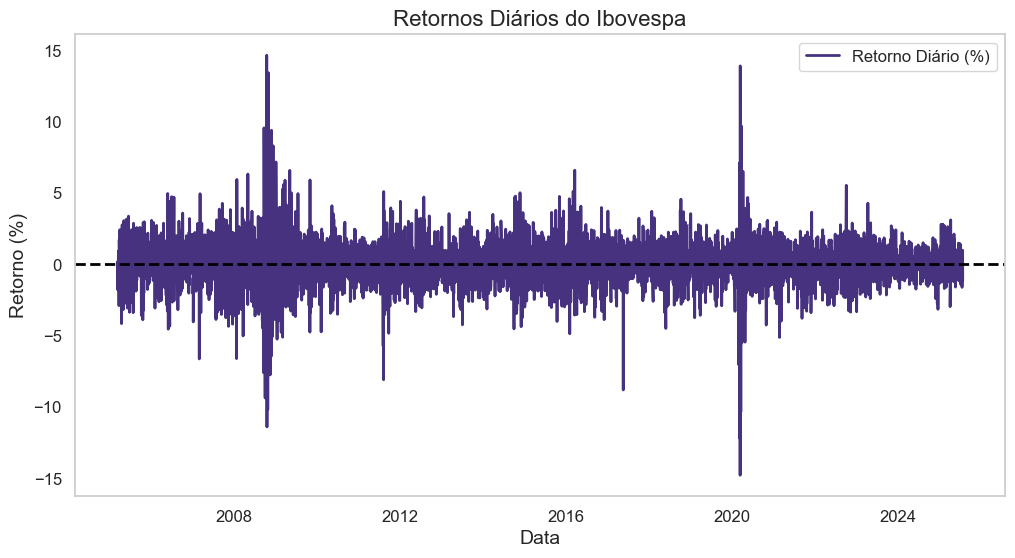

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df['ret_ibov_diario'] * 100, label='Retorno Diário (%)')  # Multiplica por 100 para mostrar em porcentagem
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Retornos Diários do Ibovespa')
plt.ylabel('Retorno (%)')
plt.xlabel('Data')
plt.legend()
plt.grid()
plt.show()

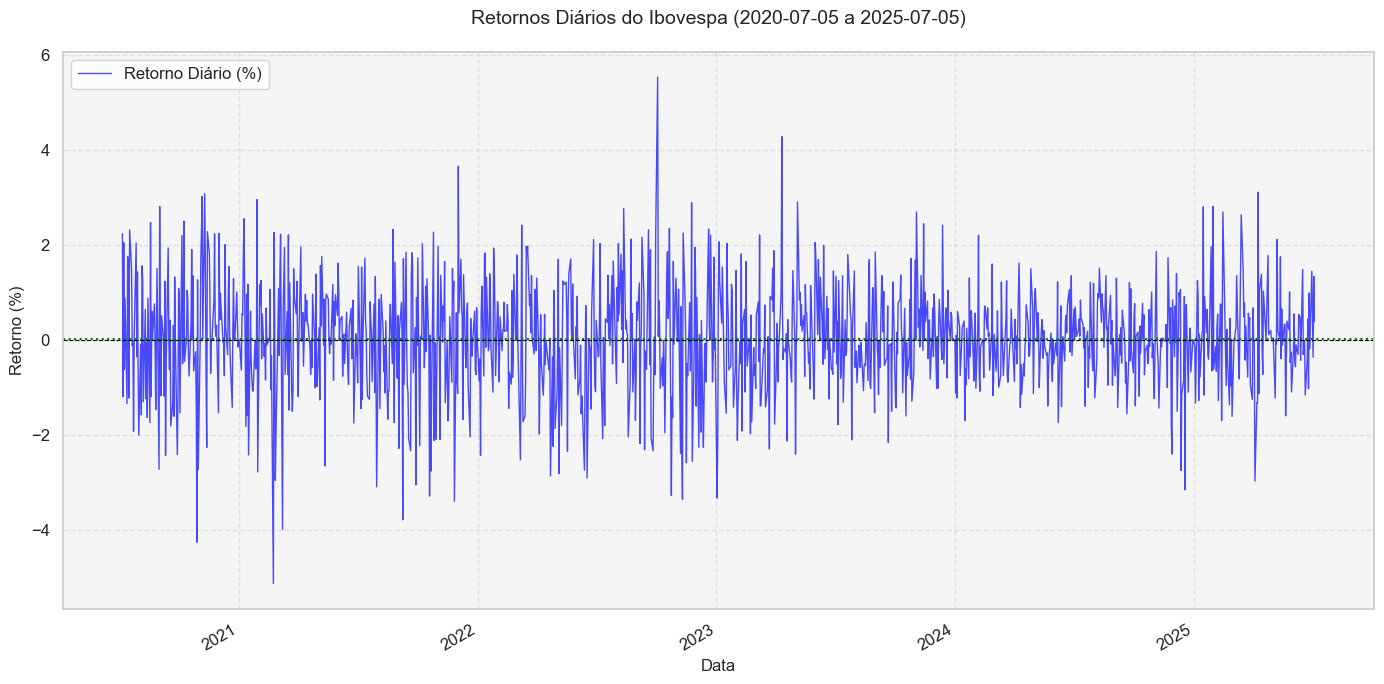

In [58]:


# 1. Configuração do período de análise
start_date = '2020-07-05'
end_date = '2025-07-05'

# 2. Verificação e preparação dos dados
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)  # Converte o índice se não for datetime

# Filtra o período com cópia explícita
df_periodo = df.loc[start_date:end_date].copy()

# Verifica se a coluna de retornos existe
if 'ret_ibov_diario' not in df_periodo.columns:
    raise ValueError("Coluna 'ret_ibov_diario' não encontrada no DataFrame")

# 3. Configuração do gráfico
plt.figure(figsize=(14, 7))

# Plot dos retornos diários (em porcentagem)
plt.plot(df_periodo.index, df_periodo['ret_ibov_diario'] * 100, 
         label='Retorno Diário (%)', 
         color='blue', 
         linewidth=1,
         alpha=0.7)

# Linha de referência zero
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# 4. Personalização do gráfico
plt.title(f'Retornos Diários do Ibovespa ({start_date} a {end_date})', fontsize=14, pad=20)
plt.ylabel('Retorno (%)', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.legend(fontsize=12, loc='upper left')

# Melhorias visuais
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#f5f5f5')  # Fundo cinza claro

# Formatação do eixo x para mostrar datas corretamente
plt.gcf().autofmt_xdate()  # Rotação automática das datas

# 5. Adicionando informações complementares
media_retorno = df_periodo['ret_ibov_diario'].mean() * 100
plt.axhline(y=media_retorno, color='green', linestyle=':', 
            label=f'Média ({media_retorno:.2f}%)', linewidth=1.5)

# 6. Exibição do gráfico
plt.tight_layout()  # Ajusta os espaçamentos
plt.show()

Retornos logarítmicos   

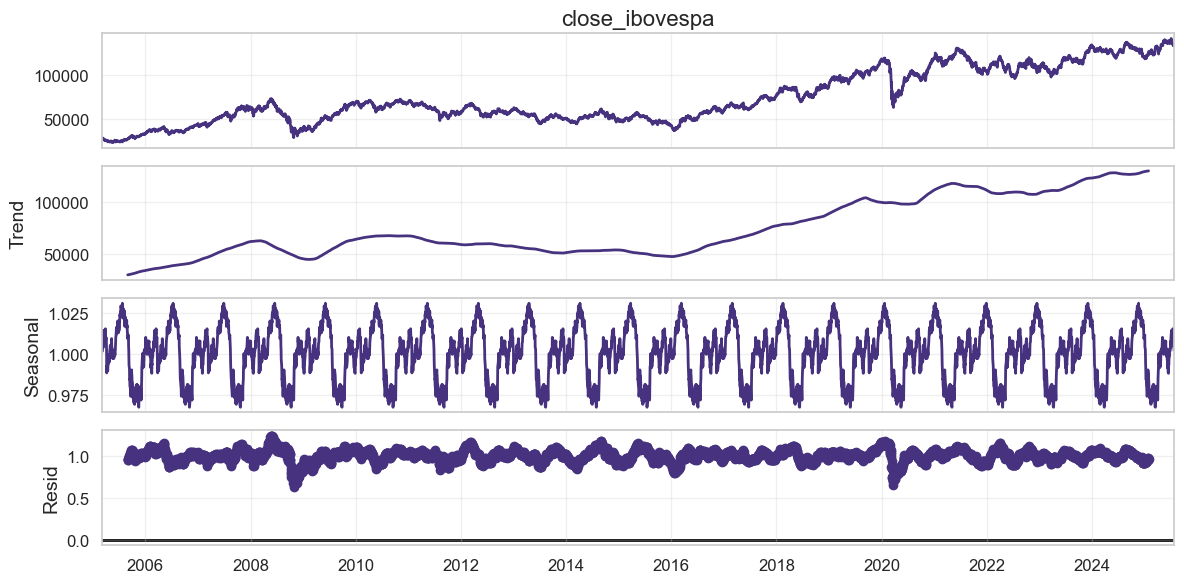

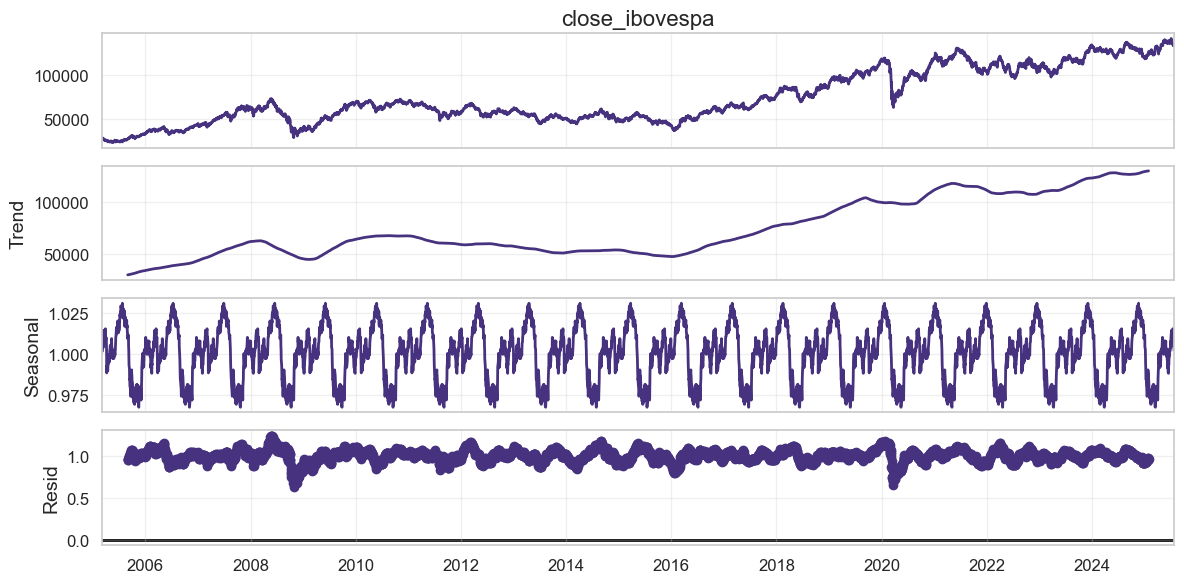

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df['close_ibovespa'], model='multiplicative', period=252)
decomp.plot()


       delta_ibov  delta_dolar
count     5313.00      5313.00
mean        19.64         0.00
std       1107.20         0.04
min     -12588.00        -0.35
25%       -500.00        -0.01
50%          0.00         0.00
75%        589.00         0.01
max      10095.00         0.34


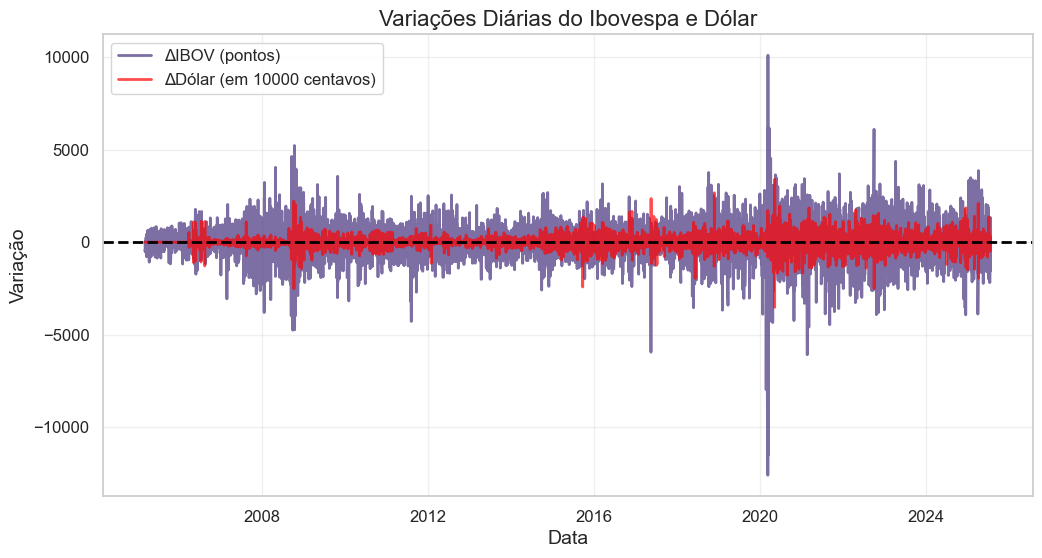

In [60]:
# Calcular variações absolutas
df['delta_ibov'] = df['close_ibovespa'].diff()  # ΔIBOVESPA em pontos
df['delta_dolar'] = df['close_dolar'].diff()    # ΔDólar em centavos

# Remover a primeira linha (NaN)
df = df.dropna(subset=['delta_ibov', 'delta_dolar'])

# Estatísticas descritivas
print(df[['delta_ibov', 'delta_dolar']].describe())

# Gráfico das variações
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['delta_ibov'], label='ΔIBOV (pontos)', alpha=0.7)
plt.plot(df.index, df['delta_dolar']*10000, label='ΔDólar (em 10000 centavos)', alpha=0.7, color='red') # Escalado para melhor visualização
plt.axhline(0, color='black', linestyle='--')
plt.title('Variações Diárias do Ibovespa e Dólar')
plt.ylabel('Variação')
plt.xlabel('Data')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Carlo\AppData\Local\Temp\ipykernel_27912\3745303891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['red', 'green'])


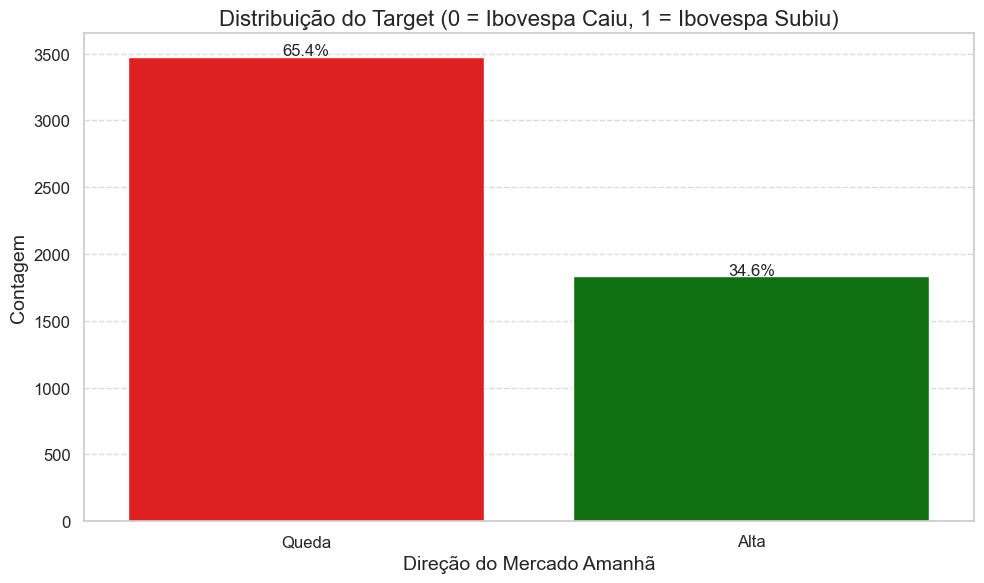

In [61]:
# Distribuição do Target
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, palette=['red', 'green'])
plt.title('Distribuição do Target (0 = Ibovespa Caiu, 1 = Ibovespa Subiu)')
plt.xlabel('Direção do Mercado Amanhã')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Queda', 'Alta'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar porcentagens
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 10,
                   f'{height/total:.1%}', ha='center')
    
plt.tight_layout()
plt.show()

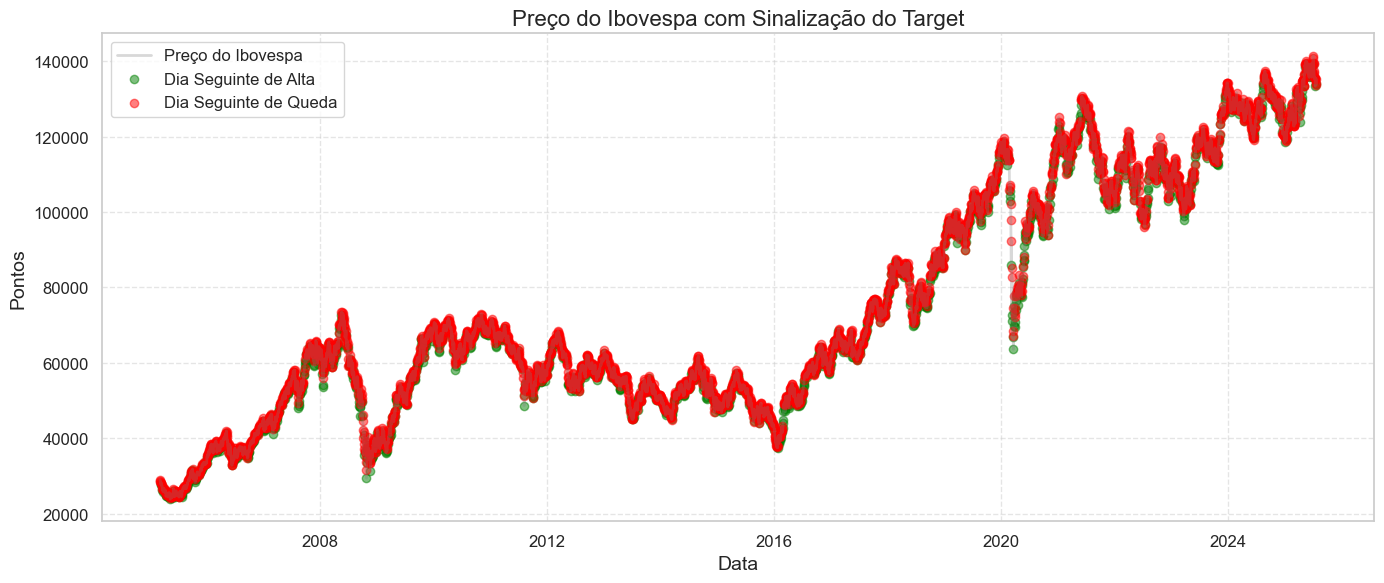

In [62]:
# Série Temporal do Target
plt.figure(figsize=(14, 6))

# Plotar o Ibovespa
plt.plot(df.index, df['close_ibovespa'], label='Preço do Ibovespa', color='gray', alpha=0.3)

# Plotar os dias de alta (target=1)
plt.scatter(df[df['target']==1].index, 
            df[df['target']==1]['close_ibovespa'], 
            color='green', label='Dia Seguinte de Alta', alpha=0.5)

# Plotar os dias de queda (target=0)
plt.scatter(df[df['target']==0].index, 
            df[df['target']==0]['close_ibovespa'], 
            color='red', label='Dia Seguinte de Queda', alpha=0.5)

plt.title('Preço do Ibovespa com Sinalização do Target')
plt.ylabel('Pontos')
plt.xlabel('Data')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

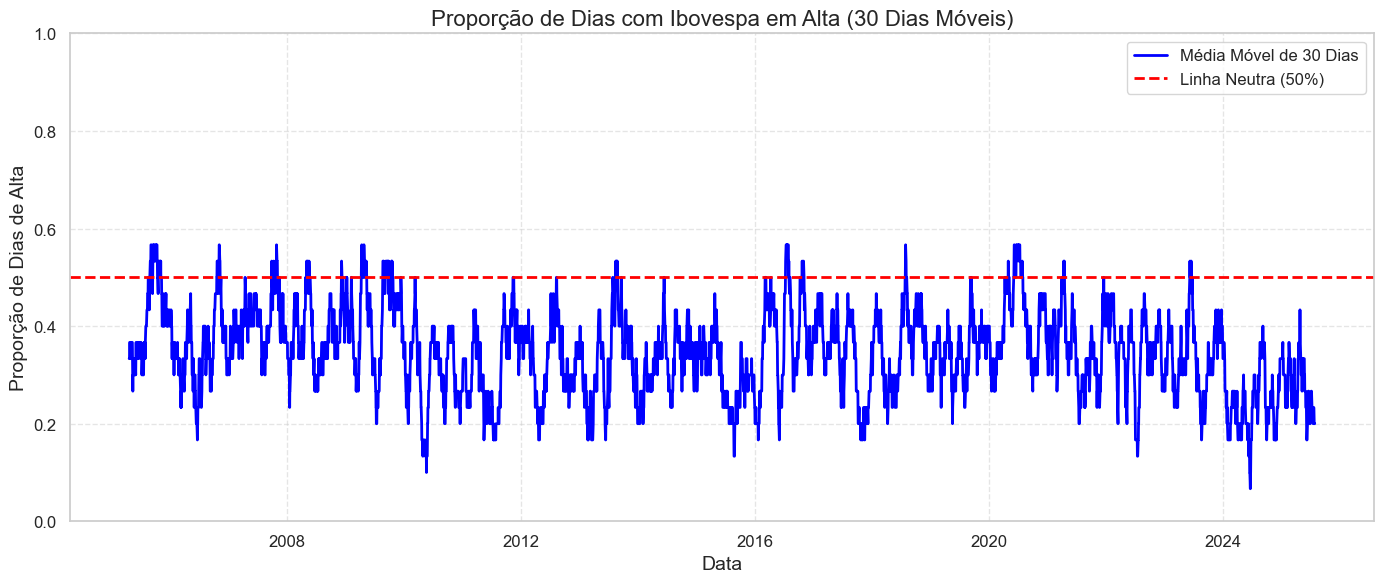

In [63]:
# Média Móvel do Target
plt.figure(figsize=(14, 6))

# Calcular média móvel de 30 dias da proporção de dias de alta
df['media_movel_alta'] = df['target'].rolling(window=30).mean()


plt.plot(df.index, df['media_movel_alta'], label='Média Móvel de 30 Dias', color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Linha Neutra (50%)')
plt.title('Proporção de Dias com Ibovespa em Alta (30 Dias Móveis)')
plt.ylabel('Proporção de Dias de Alta')
plt.xlabel('Data')
plt.ylim(0, 1)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Carlo\AppData\Local\Temp\ipykernel_27912\1176810591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia_semana', y='target', data=df,


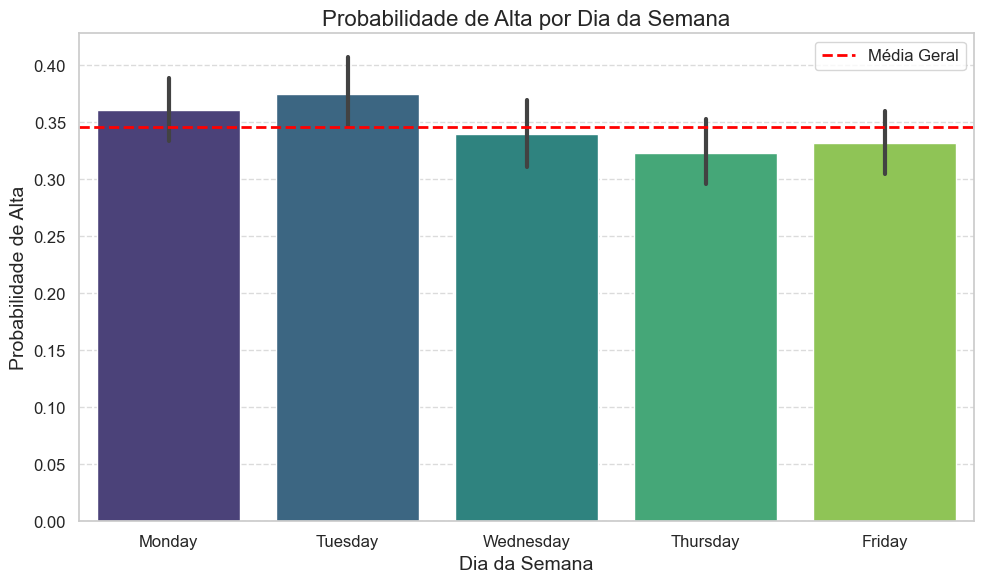

In [64]:
# Análise por Dia da Semana
df['dia_semana'] = df.index.day_name()

plt.figure(figsize=(10, 6))
sns.barplot(x='dia_semana', y='target', data=df, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
            palette='viridis')
plt.title('Probabilidade de Alta por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Probabilidade de Alta')
plt.axhline(y=df['target'].mean(), color='red', linestyle='--', label='Média Geral')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [65]:


# --- ETAPA 1: Features de Relação Preço vs. Média Móvel (Osciladores) ---
# O objetivo é medir o quão "esticado" cada ativo está em relação à sua média recente.

# Para o IBOVESPA
df['ibov_ma21'] = df['close_ibovespa'].rolling(window=21).mean()
df['preco_vs_ma21'] = np.log(df['close_ibovespa'] / df['ibov_ma21'])

# Para o DÓLAR (garantindo que ele seja incluído de forma simétrica)
df['dolar_ma21'] = df['close_dolar'].rolling(window=21).mean()
df['dolar_vs_ma21'] = np.log(df['close_dolar'] / df['dolar_ma21'])


# --- ETAPA 2: Features de Volume para o IBOV (Abordagem Log-Coesiva e Robusta) ---
# Lembre-se: Não aplicamos ao dólar spot por falta de dados de volume confiáveis.

# 1. Transforme o volume para a escala logarítmica. Esta será nossa base.
df['log_volume_ibov'] = np.log(df['volume_ibovespa'] + 1)

# 2. Calcule a média móvel da SÉRIE JÁ LOGARITMADA.
df['log_ma_volume_21d'] = df['log_volume_ibov'].rolling(window=21).mean()

# 3. Calcule o "choque de volume" como o desvio do log-volume em relação à sua média.
df['choque_de_volume_log'] = df['log_volume_ibov'] - df['log_ma_volume_21d']
# Interpretação: Mede o quão incomum (em termos percentuais) foi o volume de hoje 
# em relação à sua média recente, de forma mais estável e menos sensível a outliers.


# --- ETAPA 3: Limpeza das Colunas Intermediárias e Originais ---
# Removemos as colunas que serviram de base para os cálculos, 
# mantendo apenas as features finais que irão para o modelo.

colunas_para_dropar = [
    'volume_ibovespa',    # Usamos o 'log_volume_ibov' e 'choque_de_volume_log' no lugar.
    'ibov_ma21',          # Usamos o 'preco_vs_ma21' no lugar.
    'dolar_ma21',         # Usamos o 'dolar_vs_ma21' no lugar.
    'log_ma_volume_21d',
    'volume_dolar'   # Era apenas um passo intermediário.
]

df = df.drop(columns=colunas_para_dropar, errors='ignore')

# --- Verificação Final ---
print("DataFrame após a criação e limpeza das novas features:")
print(df[['preco_vs_ma21', 'dolar_vs_ma21', 'log_volume_ibov', 'choque_de_volume_log']].tail())

DataFrame após a criação e limpeza das novas features:
            preco_vs_ma21  dolar_vs_ma21  log_volume_ibov  \
data                                                        
2025-07-18          -0.03           0.01            16.13   
2025-07-21          -0.02           0.01            15.72   
2025-07-22          -0.02           0.01            15.77   
2025-07-23          -0.01           0.01            15.69   
2025-07-24          -0.02           0.00            15.60   

            choque_de_volume_log  
data                              
2025-07-18                  0.34  
2025-07-21                 -0.04  
2025-07-22                  0.01  
2025-07-23                 -0.05  
2025-07-24                 -0.13  


In [66]:
# --- FEATURES DE AÇÃO DE PREÇO (Abordagem Otimizada) ---

# 1. Amplitude e Gaps (usando log para consistência)
df['range_log_ibov'] = np.log(df['high_ibovespa'] / df['low_ibovespa'])
df['range_log_dolar'] = np.log(df['high_dolar'] / df['low_dolar'])
df['gap_log_ibov'] = np.log(df['open_ibovespa'] / df['close_ibovespa'].shift(1))
# (O mesmo para o dólar, se for de interesse)
# df['gap_log_dolar'] = np.log(df['open_dolar'] / df['close_dolar'].shift(1))


# 2. Posição Relativa do Fechamento (já é normalizada, manter)
df['pos_close_ibov'] = (df['close_ibovespa'] - df['low_ibovespa']) / (df['high_ibovespa'] - df['low_ibovespa'])
df['pos_close_dolar'] = (df['close_dolar'] - df['low_dolar']) / (df['high_dolar'] - df['low_dolar'])


# 3. Sombras Normalizadas (a correção mais importante)
# Primeiro, calcule a amplitude total para evitar repetição
amplitude_total_ibov = df['high_ibovespa'] - df['low_ibovespa']
# Evitar divisão por zero em dias sem variação
amplitude_total_ibov = amplitude_total_ibov.replace(0, np.nan) 

# Sombra superior normalizada
df['sombra_sup_norm_ibov'] = (df['high_ibovespa'] - np.maximum(df['open_ibovespa'], df['close_ibovespa'])) / amplitude_total_ibov

# Sombra inferior normalizada
df['sombra_inf_norm_ibov'] = (np.minimum(df['open_ibovespa'], df['close_ibovespa']) - df['low_ibovespa']) / amplitude_total_ibov

# Preencher quaisquer NaNs gerados pela divisão por zero com 0
df[['sombra_sup_norm_ibov', 'sombra_inf_norm_ibov']] = df[['sombra_sup_norm_ibov', 'sombra_inf_norm_ibov']].fillna(0)

análise de viés 

Binning

In [67]:
# Interação entre a volatilidade diária e a tendência de médio prazo
df['inter_vol_tend_ibov'] = df['range_log_ibov'] * df['ibov_vs_ma21']

# Interação entre o choque de volume e o quão "esticado" o preço está
df['inter_vol_preco_ibov'] = df['choque_de_volume_log'] * df['preco_vs_ma21']

# Interação entre o retorno diário do dólar e a posição de fechamento do IBOV
df['inter_dolar_pos_close_ibov'] = df['log_ret_dolar_1d'] * df['pos_close_ibov']

In [68]:
colunas_para_dropar = [
    # --- 1. Features de Retorno e Variação Redundantes ---
    # Motivo: As versões logarítmicas são estatisticamente mais robustas e consistentes.
    'ret_ibov_diario',        # Substituída pela 'log_ret_ibov_1d'
    'delta_ibov',             # Substituída pela 'log_ret_ibov_1d'
    'delta_dolar',            # Substituída pela 'log_ret_dolar_1d'
    'ret_ibov_5d',            # Substituída pela 'tendencia_ibov_5d' (versão log)
    'ret_ibov_21d',           # Substituída pela 'tendencia_ibov_21d' (versão log)
    
    # --- 2. Médias Móveis Brutas (Não-Estacionárias e com Problema de Escala) ---
    # Motivo: A informação útil delas já foi extraída para as features de oscilador ('..._vs_ma...'), que são estacionárias.
    'ibov_ma2',
    'ibov_ma5',
    'ibov_ma7',
    'ibov_ma10',
    'ibov_ma14',
    'ibov_ma21',
    'dolar_ma2',
    # 'dolar_ma5',
    'dolar_ma7',
    'dolar_ma10',
    'dolar_ma14',
    'dolar_ma21',
    # 'ibov_ewm_5',             # O mesmo se aplica às médias móveis exponenciais
    # 'ibov_ewm_7',
    'ibov_ewm_9',
    'ibov_ewm_10',
    'ibov_ewm_12',
    'ibov_ewm_15',
    'ibov_ewm_20',
    
    # --- 3. Features Discretizadas/Binarizadas (Potencialmente Redundantes) ---
    # Motivo: Perdem informação valiosa. É preferível deixar o modelo trabalhar com as features contínuas.
    # Avalie a possibilidade de removê-las se não se mostrarem muito preditivas na análise.
    # 'media_movel_alta',
    'log_ret_ibov_1d_bin',
    'log_ret_dolar_1d_bin',
    'tendencia_ibov_21d_bin',
    'ibov_ma14_bin',

    # --- 4. Colunas de Apoio (Não devem ser usadas como features) ---
    'close_amanha',           # Usada apenas para criar o 'target'
]

# Você pode usar esta lista para criar um DataFrame limpo para modelagem:
# X = df.drop(columns=colunas_para_dropar, errors='ignore')
# Lembre-se de dropar também o 'target' e colunas de data/OHLC do X.

df = df.drop(columns=colunas_para_dropar, errors='ignore')

In [69]:
warnings.filterwarnings('ignore', category=UserWarning)

def analisar_feature_classificacao(dataframe, feature_col, target_col='target', 
                                   q=10, confianca=0.95, 
                                   start_date=None, end_date=None):
    """
    Realiza uma análise completa de uma feature para um modelo de classificação binária,
    com a opção de filtrar por um intervalo de datas.
    ... (docstring original) ...
    """
    
    # --- NOVO BLOCO: FILTRAGEM POR DATA ---
    df_filtrado = dataframe.copy()
    if start_date:
        df_filtrado = df_filtrado[df_filtrado.index >= pd.to_datetime(start_date)]
    if end_date:
        df_filtrado = df_filtrado[df_filtrado.index <= pd.to_datetime(end_date)]
        
    if df_filtrado.empty:
        print(f"Nenhum dado encontrado para o período especificado.")
        return None

    periodo_str = f"({start_date or 'Início'} a {end_date or 'Fim'})"
    print(f"--- Análise da Feature: '{feature_col}' no Período: {periodo_str} ---")
    
    # O resto da função agora opera em 'df_filtrado' em vez de 'dataframe'
    
    bin_col = f'{feature_col}_bin'
    try:
        df_filtrado[bin_col] = pd.qcut(df_filtrado[feature_col], q=q, labels=False, duplicates='drop')
    except ValueError as e:
        print(f"Não foi possível binarizar a feature '{feature_col}'. Motivo: {e}")
        return None

    analise_agrupada = df_filtrado.groupby(bin_col)[target_col].agg(['mean', 'count'])
    
    Z = norm.ppf(1 - (1 - confianca) / 2)
    analise_agrupada['ic_margem'] = Z * np.sqrt(analise_agrupada['mean'] * (1 - analise_agrupada['mean']) / analise_agrupada['count'])
    analise_agrupada['ic_inferior'] = analise_agrupada['mean'] - analise_agrupada['ic_margem']
    analise_agrupada['ic_superior'] = analise_agrupada['mean'] + analise_agrupada['ic_margem']

    fig, ax = plt.subplots(figsize=(12, 7))
    analise_agrupada['mean'].plot(kind='bar', ax=ax, color='skyblue', yerr=analise_agrupada['ic_margem'], capsize=5, ecolor='darkgray')
    ax.axhline(0.5, color='red', linestyle='--', label=f'Sem Viés (50%)')
    ax.set_title(f'Probabilidade de Alta do IBOV por Decil de "{feature_col}"\nPeríodo: {periodo_str}', fontsize=16)
    ax.set_ylabel(f'Probabilidade Média de Alta (+/- {confianca:.0%} IC)', fontsize=12)
    ax.set_xlabel(f'Decil da Feature (0=Mais Baixo, {q-1}=Mais Alto)', fontsize=12)
    ax.legend()
    plt.xticks(rotation=0)
    plt.show()
    
    return analise_agrupada[['mean', 'count', 'ic_inferior', 'ic_superior']]
# Dicionário com os regimes de mercado que queremos analisar
# O formato é: 'Nome do Regime': ('YYYY-MM-DD start', 'YYYY-MM-DD end')
# Usar 'None' significa "desde o início" ou "até o fim".

periodos_de_interesse = {
    'Dados Completos': (None, None),
    'Crise Subprime 2008-2009': ('2008-01-01', None),
    'Pós-Crise / Gov. Dilma I': ('2010-01-01', None),
    'Crise 2015-2016 / Impeachment': ('2015-01-01', None),
    'Pandemia COVID-19': ('2020-02-01', None),
    'Pós-Pandemia / Juros Altos': ('2021-07-01', None)
}

# Sua lista de features numéricas para análise
features_para_analisar = [
    # 'log_ret_ibov_1d',           # Retorno diário do Ibov
    # 'log_ret_dolar_1d',            # Retorno diário do Dólar
    # 'tendencia_ibov_21d',       # Retorno mensal do Ibov (longo prazo)
    # 'ret_ibov_vs_dolar_5d',   # Retorno relativo semanal
    # 'ibov_ma14'              # Média Móvel
]

# === LOOP ANINHADO PARA ANÁLISE DE REGIMES ===

# Loop externo: itera sobre cada feature que queremos analisar
for feature in features_para_analisar:
    
    # Imprime um título principal para a feature, para organizar a saída
    print(f"\n\n====================================================================")
    print(f"        ANÁLISE COMPLETA DA FEATURE: {feature.upper()}")
    print(f"====================================================================")
    
    # Loop interno: itera sobre cada regime de mercado definido no dicionário
    for nome_periodo, (data_inicio, data_fim) in periodos_de_interesse.items():
        
        # Chama a nossa função poderosa, passando a feature e as datas do regime atual
        analisar_feature_classificacao(
            dataframe=df, 
            feature_col=feature,
            start_date=data_inicio,
            end_date=data_fim
        )

apos analise de features, selecionar abaixo para o modelo final

In [70]:
df_para_salvar = df.reset_index()

# Define o nome para nossa nova tabela de features
nome_tabela_features = "features_completas"

# O caminho do DB já está no nosso módulo 'config'
db_path = str(config.DB_PATH)

print(f"Salvando o DataFrame final com features na tabela '{nome_tabela_features}' em: {db_path}")

try:
    # Conecta ao nosso banco de dados já existente em modo de escrita
    con = duckdb.connect(database=db_path, read_only=False)

    # Salva o DataFrame na nova tabela, substituindo-a se já existir
    con.execute(f"CREATE OR REPLACE TABLE {nome_tabela_features} AS SELECT * FROM df_para_salvar")

    # Verifica as tabelas no banco de dados para confirmar a criação
    print("\nTabelas existentes no banco de dados:")
    display(con.execute("SHOW TABLES").fetchdf())

    con.close()
    
    print(f"\n✅ DataFrame de features salvo com sucesso na tabela '{nome_tabela_features}'!")

except Exception as e:
    print(f"❌ Ocorreu um erro ao salvar no banco de dados: {e}")

Salvando o DataFrame final com features na tabela 'features_completas' em: C:\Users\Carlo\Desktop\Portfolio\postech-challenge-ibov\data\mercados.duckdb

Tabelas existentes no banco de dados:


,name
0,features_baseline
1,features_completas
2,precos_diarios



✅ DataFrame de features salvo com sucesso na tabela 'features_completas'!
